ancestors are all at a single redshift

progenitors are the main line of progenitors all the way back in redshift. by default chosen to be the most massive ancestor at each time step.

In [1]:
import ytree
import numpy as np
import matplotlib.pyplot as plt
import squarify  
import seaborn as sns
import matplotlib
from random import sample

In [2]:
treedir = "/Users/fardila/Documents/Data/data_viz/Enia_project/trees/"
treefile = 'tree_0_0_1.dat'

In [3]:
a = ytree.load(treedir+treefile)
a.set_selector("max_field_value", "mvir") # the first progenitor descendant will be the most massive one

Performance will be improved by saving this arbor with "save_arbor" and reloading:
	>>> a = ytree.load("/Users/fardila/Documents/Data/data_viz/Enia_project/trees/tree_0_0_1.dat")
	>>> fn = a.save_arbor()
	>>> a = ytree.load(fn)


In [70]:
def make_treemap_from_halo_masses(halo_masses, n=1000, random = False, log=False, sorted_by=None, labels=None,
                                 scale_masses=None):
    
    halo_masses = np.asarray(halo_masses)
    
    if len(halo_masses)<n:
        n=len(halo_masses)
    colorbar_label = u'Halo Mass $[\log($ M$_{\odot})]$'
    
    
    if log:
        halo_masses = np.log10(halo_masses)
#         colorbar_label = u'Halo Mass $[\log($ M$_{\odot})]$'
    else:
        exponent = int(max(np.log10(halo_masses)))
#         colorbar_label = u'Halo Mass $[10^{0}$ M$_{{\odot}}]$'.format({exponent})
        
    if sorted_by is not None:
        halo_masses = halo_masses[np.argsort(sorted_by)]
        if labels is not None:
            labels = labels[np.argsort(sorted_by)]
            
    if random:
        halo_masses = sample(list(halo_masses), n)
        halo_masses.sort()
    else: #take top n halos
        halo_masses = halo_masses[-n:]
        
    # create a color palette, mapped to these values
    if scale_masses is None:
        scale_masses = halo_masses
    cmap = matplotlib.cm.jet
    mini=min(np.log10(scale_masses))
    maxi=max(np.log10(scale_masses))
    norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
    colors = [cmap(norm(value)) for value in np.log10(halo_masses)]
    
    
    plt.figure(figsize=[20,20])
    sns.set()

    # create dummy invisible image with a color map
    img = plt.imshow([np.log10(scale_masses)], cmap=cmap)
    img.set_visible(False)
    
    #get rid of edges
    #bar_kwargs = {'linewidth':0}
    bar_kwargs = {}
    
    squarify.plot(sizes=halo_masses,label=labels, alpha=.7, color=colors, bar_kwargs=bar_kwargs )
    cbar = plt.colorbar(img, orientation="horizontal", shrink=.96, pad=0.1)
    cbar.ax.tick_params(labelsize=20) 
    cbar.set_label(label= colorbar_label,size=30,weight='bold')
    cbar.set_alpha(0.7)
    cbar.draw_all()
    
#     print(np.log10(cbar.get_ticks()))
    plt.axis('off')
    
    plt.show()

# Make plots

In [5]:
masses_all_halos_today = np.array(a['mvir'])

Reading root fields: 100%|██████████| 260610/260610 [00:08<00:00, 30157.53it/s]


In [8]:
print(len(masses_all_halos_today), " halos at z=0")

260610  halos at z=0


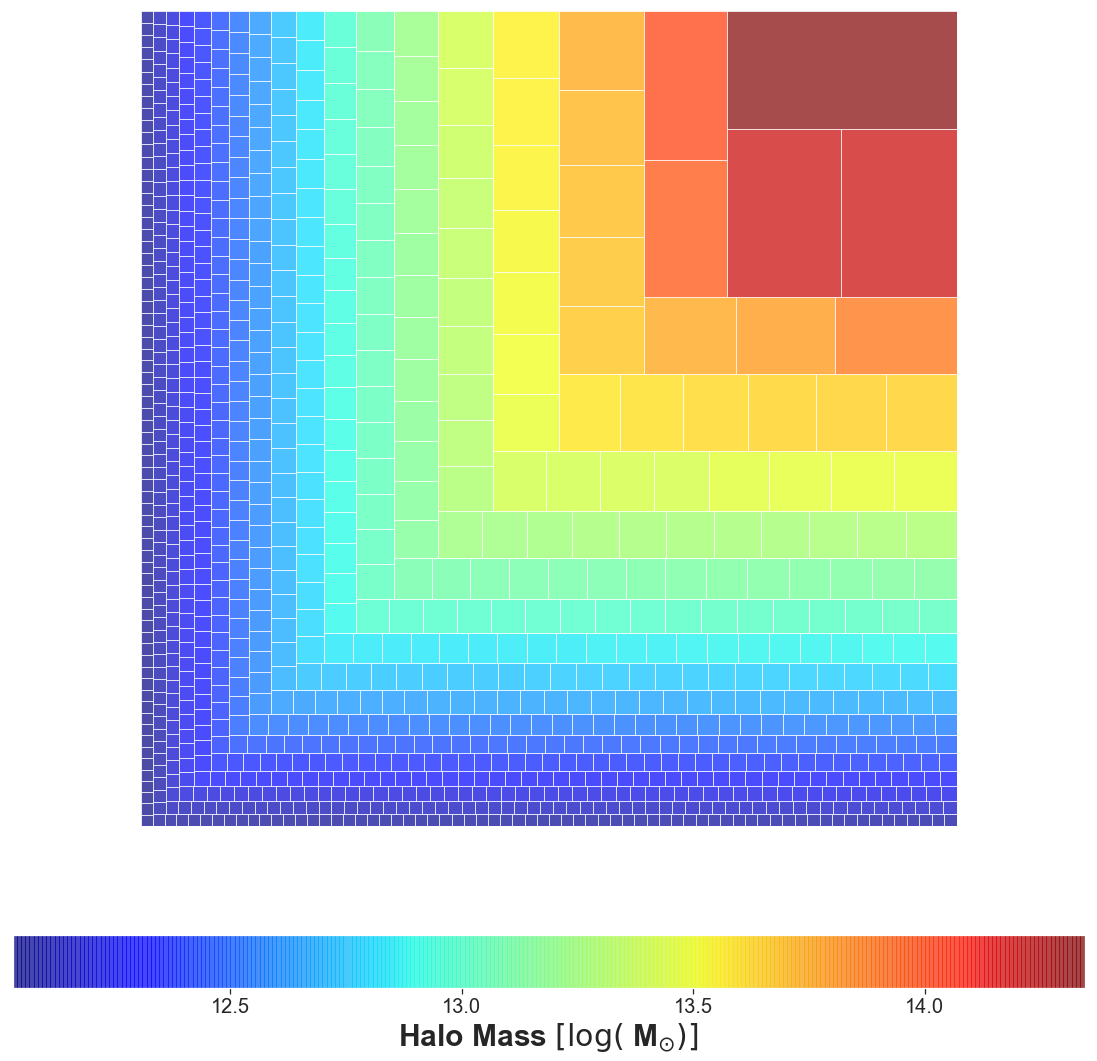

In [15]:
make_treemap_from_halo_masses(masses_all_halos_today, log=False, n=1000,
                              sorted_by=masses_all_halos_today)

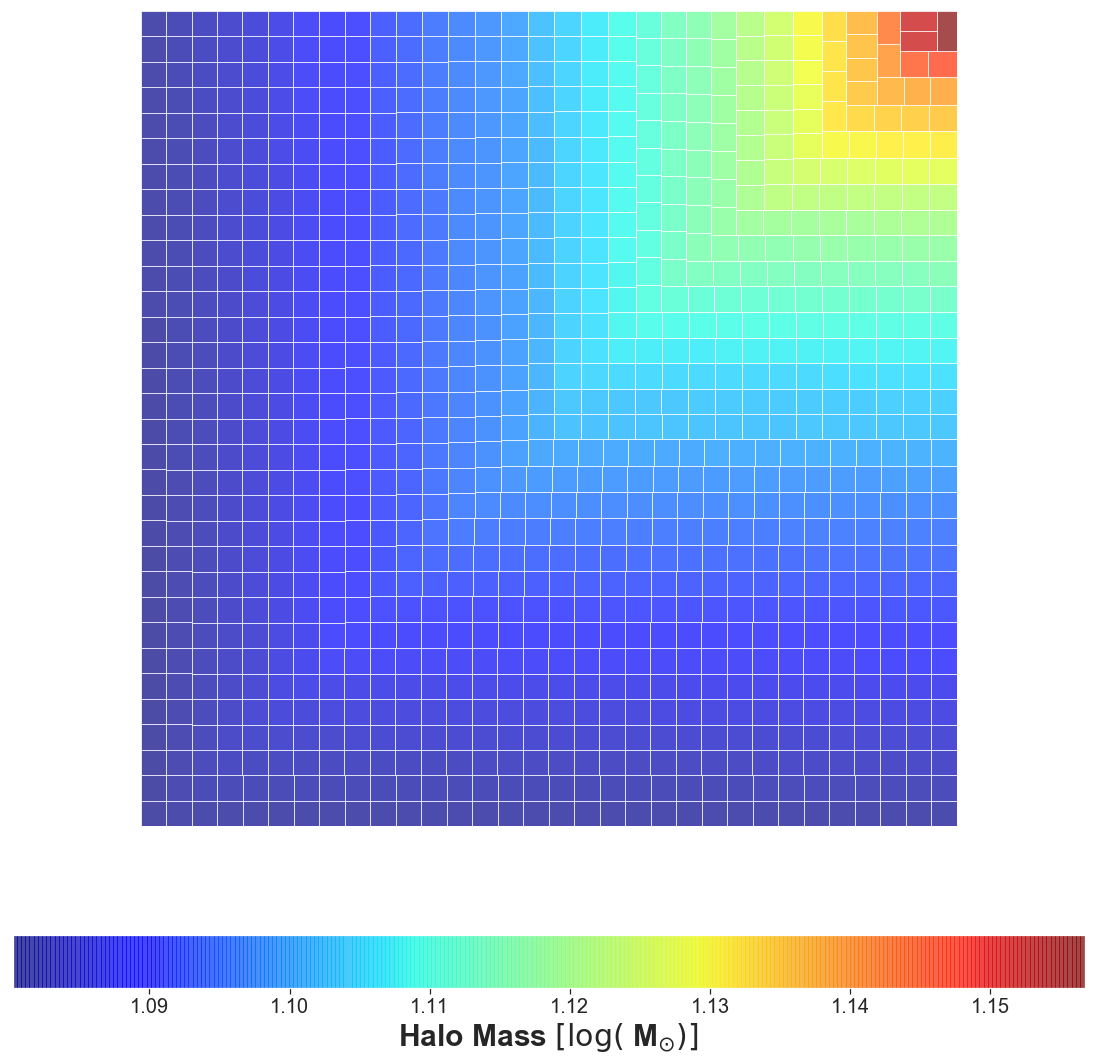

In [18]:
make_treemap_from_halo_masses(masses_all_halos_today, log=True, n=1000,
                              sorted_by=masses_all_halos_today)

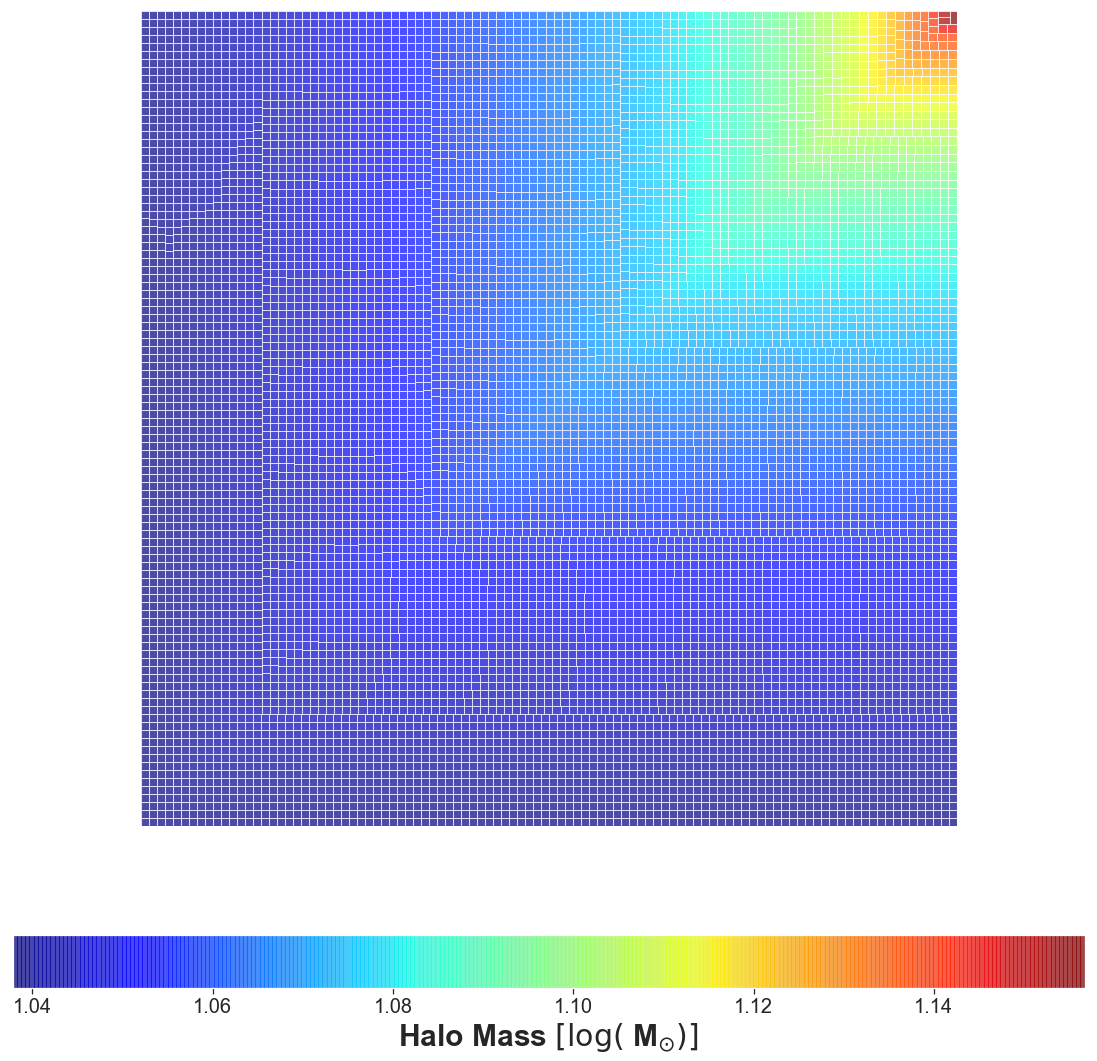

In [16]:
make_treemap_from_halo_masses(masses_all_halos_today, log=True, n=10000,
                              sorted_by=masses_all_halos_today)

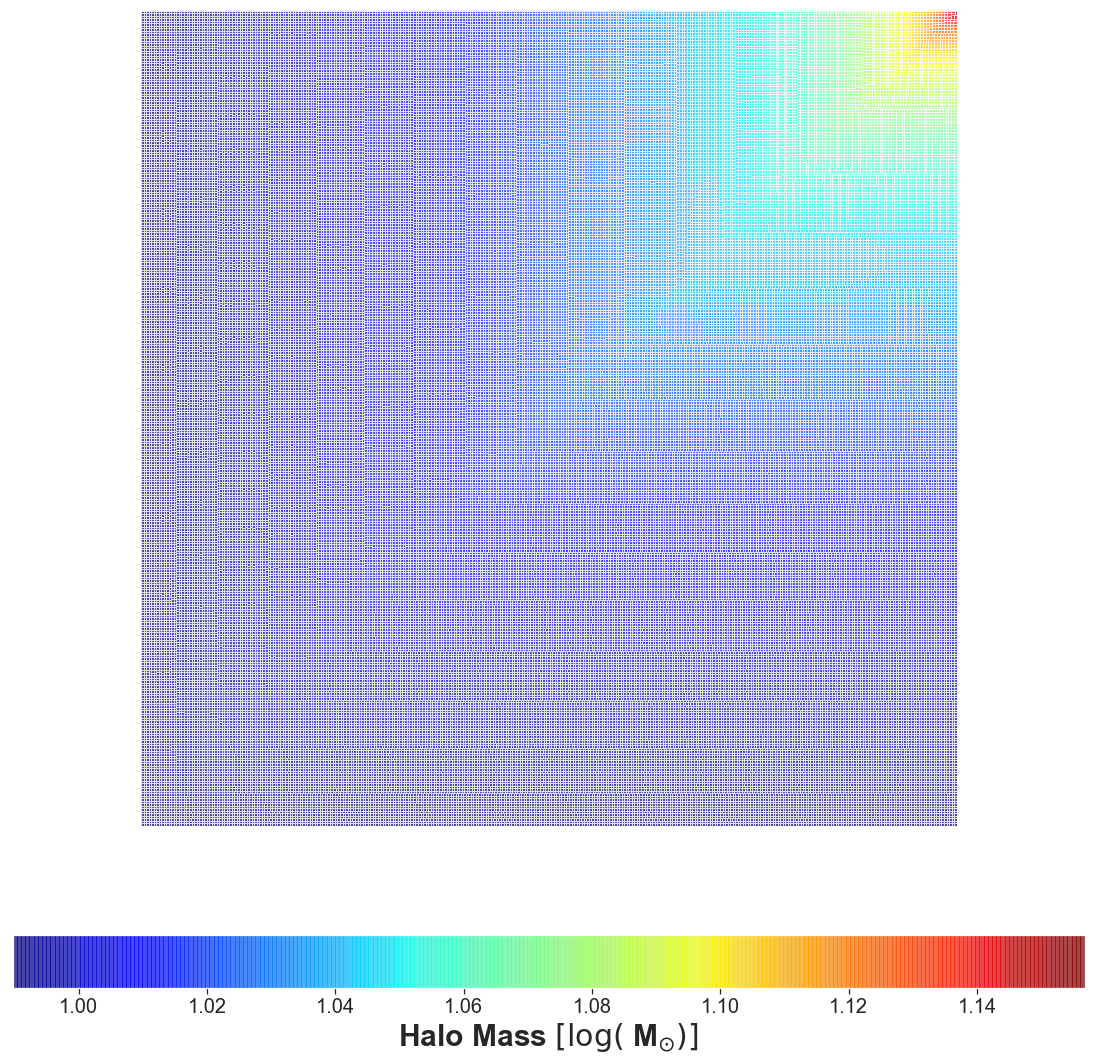

In [17]:
make_treemap_from_halo_masses(masses_all_halos_today, log=True, n=100000,
                              sorted_by=masses_all_halos_today)

## selecting a specific halo 

In [31]:
less_massive_halo_today = a[100]
print(np.log10(less_massive_halo_today['mvir']))

13.015778756389041


In [51]:

ancestor_masses = []
for progenitor in less_massive_halo_today['prog']:
    ancestors = progenitor.ancestors
    
#     print( progenitor, ancestors)
    if ancestors != None:
        ancestors.append(progenitor)
        masses = [float(ancestor['mvir']) for ancestor in ancestors]
        ancestor_masses += masses
    
print(len(ancestor_masses))

680


In [38]:
progenitors_less_massive_halo_today = less_massive_halo_today['prog']
masses_progenitors_less_massive_halo_today = less_massive_halo_today['prog', 'mvir']

ancestors_less_massive_halo_today = less_massive_halo_today.ancestors
masses_ancestors_less_massive_halo_today = [ancestor['mvir'] for ancestor in ancestors_less_massive_halo_today]

print(len(masses_progenitors_less_massive_halo_today), ' progenitors')
print(len(masses_ancestors_less_massive_halo_today), ' ancestors')

77  progenitors
5  ancestors


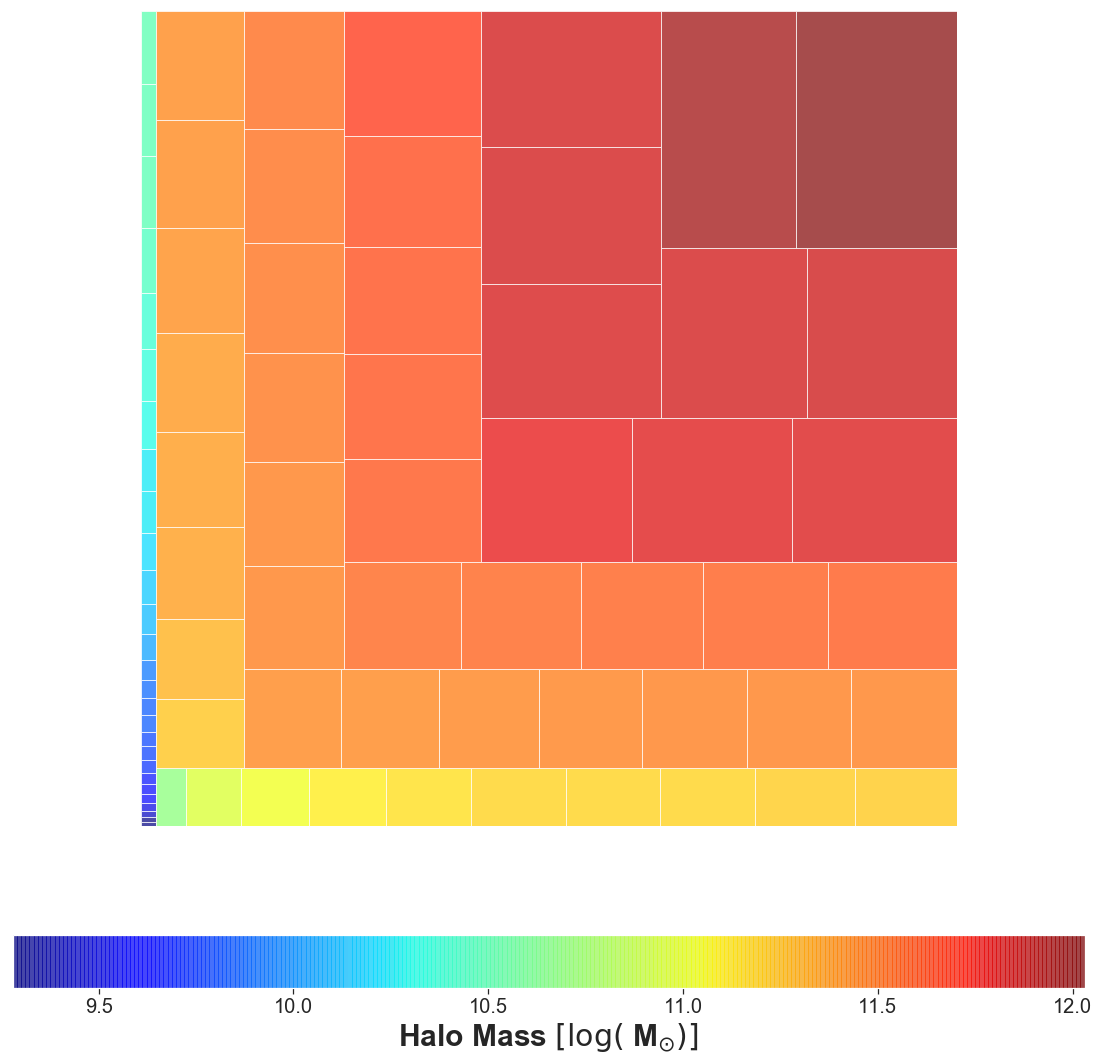

In [27]:
make_treemap_from_halo_masses(masses_progenitors_less_massive_halo_today, log=False, n=1000,
                              sorted_by=masses_progenitors_less_massive_halo_today)

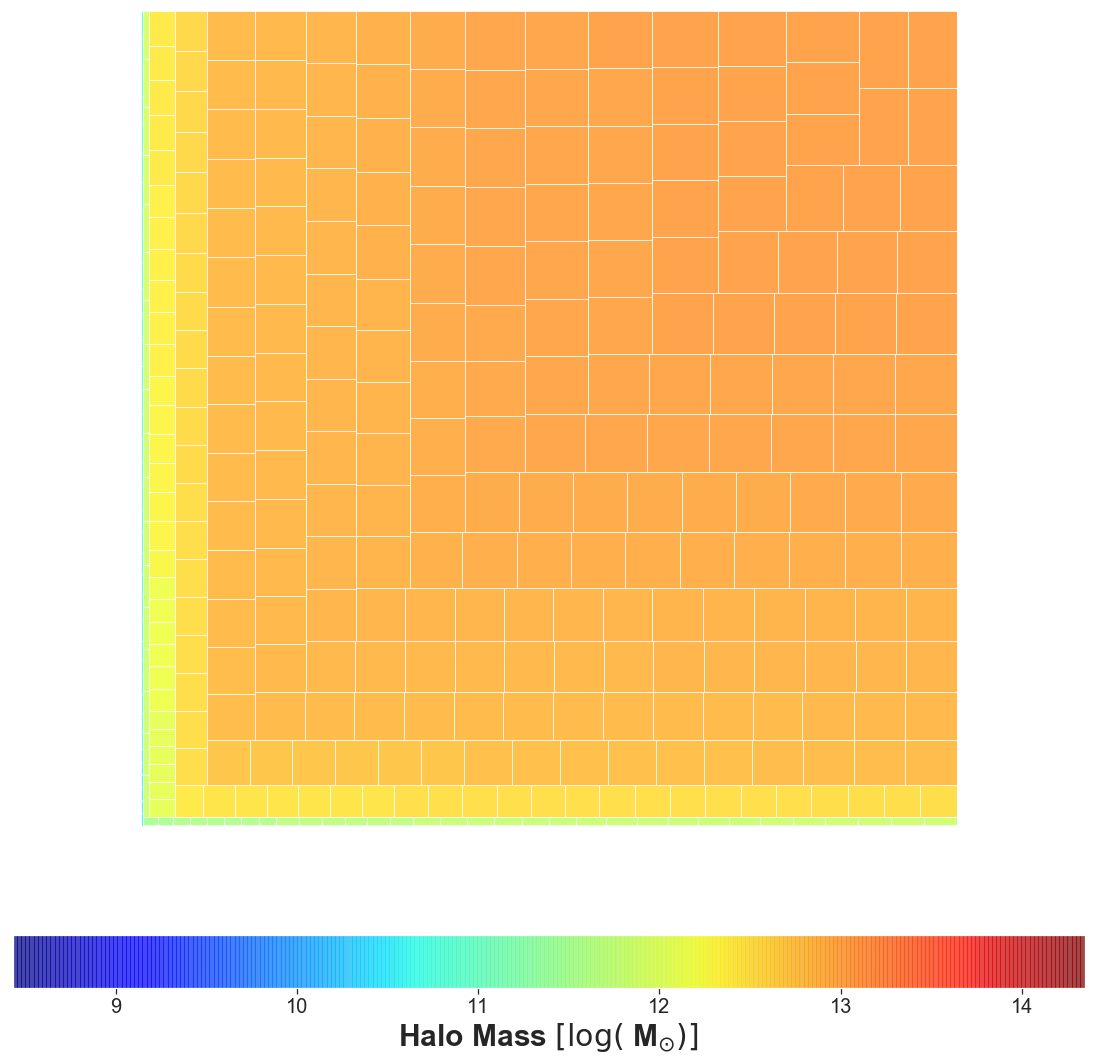

In [71]:
make_treemap_from_halo_masses(ancestor_masses, log=False, n=1000,
                              sorted_by=ancestor_masses, scale_masses=masses_all_halos_today)

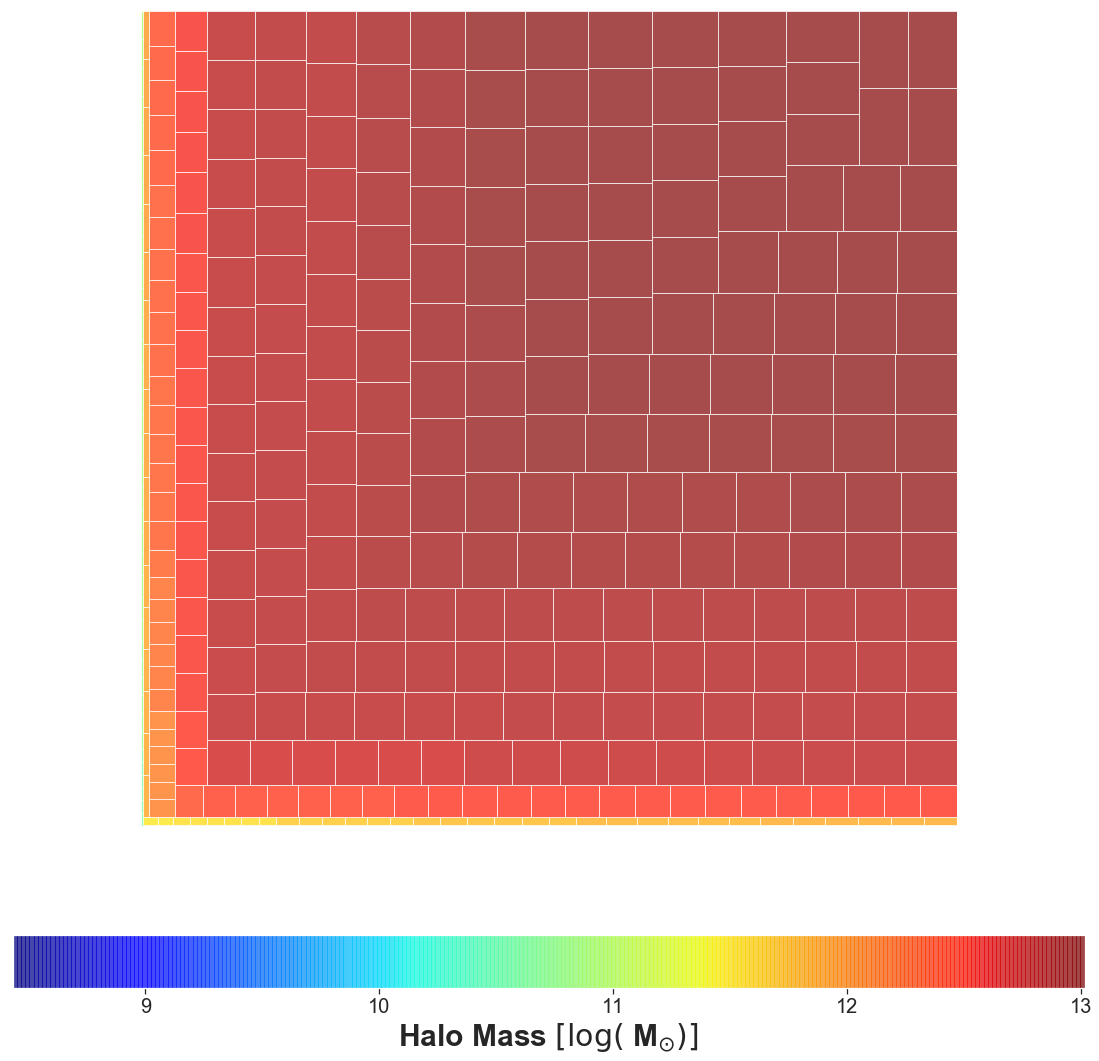

In [61]:
make_treemap_from_halo_masses(ancestor_masses, log=False, n=1000,
                              sorted_by=ancestor_masses)

In [63]:
np.array(np.log10(ancestor_masses))[np.argsort(ancestor_masses)]

array([ 8.43552585,  8.43552585,  8.43552585,  8.43552585,  8.43552585,
        8.43552585,  8.61161711,  8.61161711,  8.61161711,  8.61161711,
        8.61161711,  8.61161711,  8.73655585,  8.73655585,  8.73655585,
        8.73655585,  8.73655585,  8.73655585,  8.73655585,  8.73655585,
        8.83352958,  8.83352958,  8.83352958,  8.83352958,  8.83352958,
        8.83352958,  8.83352958,  8.83352958,  8.91270021,  8.91270021,
        8.91270021,  8.91270021,  8.91270021,  8.91270021,  8.91270021,
        8.97963941,  8.97963941,  8.97963941,  8.97963941,  8.97963941,
        8.97963941,  8.97963941,  8.97963941,  8.97963941,  8.97963941,
        8.97963941,  8.97963941,  8.97963941,  8.97963941,  8.97963941,
        8.97963941,  8.97963941,  8.97963941,  8.97963941,  8.97963941,
        8.97963941,  8.97963941,  8.97963941,  8.97963941,  8.97963941,
        8.97963941,  8.97963941,  8.97963941,  8.97963941,  8.97963941,
        9.0374265 ,  9.0374265 ,  9.0374265 ,  9.0374265 ,  9.03

In [65]:
np.log10(np.sum(ancestor_masses))

15.261949181313675

In [67]:
np.log10(np.sum(masses_progenitors_less_massive_halo_today))

array(14.48549801)